IMPORT LIBRARIES

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [57]:
cc = pd.read_csv('Churn_Data.csv')

# Display the first few rows of the dataset
print(cc.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

EXPLORE THE DATASET

In [58]:
print(cc.info())
print(cc.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
print(cc.describe())


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


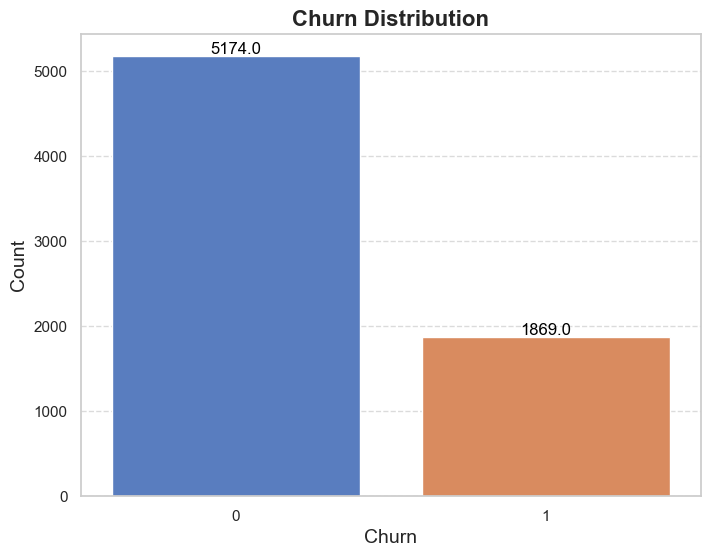

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot with styling
plt.figure(figsize=(8, 6))
sns.set_palette("muted")  # You can try other color palettes as well
ax = sns.countplot(data=cc, x='Churn')

# Adding title and labels
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding the count numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Display grid and show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [61]:
# Fill missing values for numerical columns with the median
numerical_cols = cc.select_dtypes(include=[np.number]).columns
cc[numerical_cols] = cc[numerical_cols].fillna(cc[numerical_cols].median())


CHECK OUTLIERS

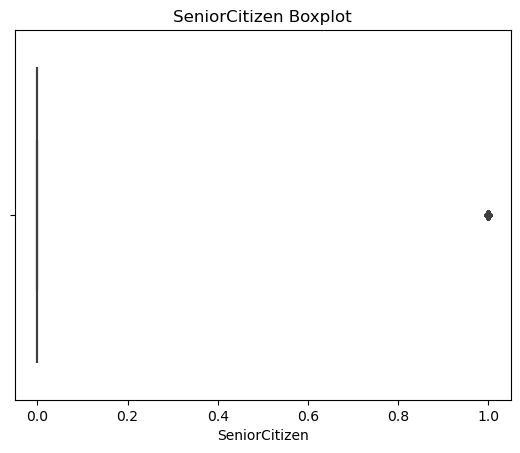

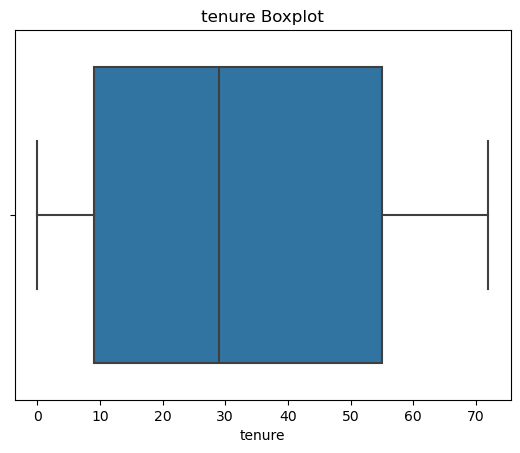

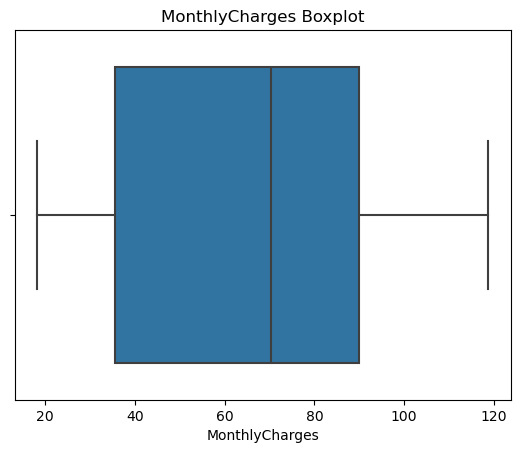

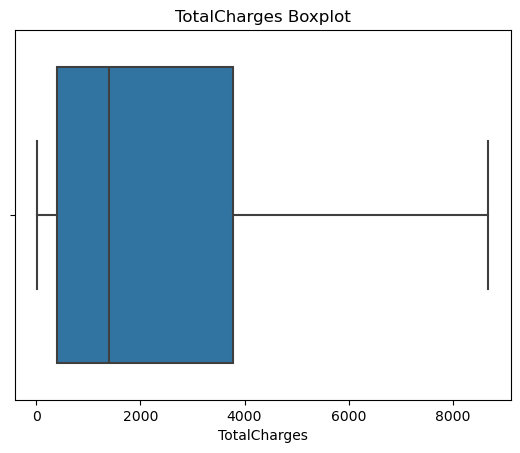

In [62]:
for col in cc.select_dtypes(include=[np.number]).columns:
    sns.boxplot(data=cc, x=col)
    plt.title(f'{col} Boxplot')
    plt.show()


ENCODE CATEGORICAL VALUES

In [63]:
categorical_cols = cc.select_dtypes(include=['object']).columns

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    cc[col] = le.fit_transform(cc[col])


FEATURE SELECTION

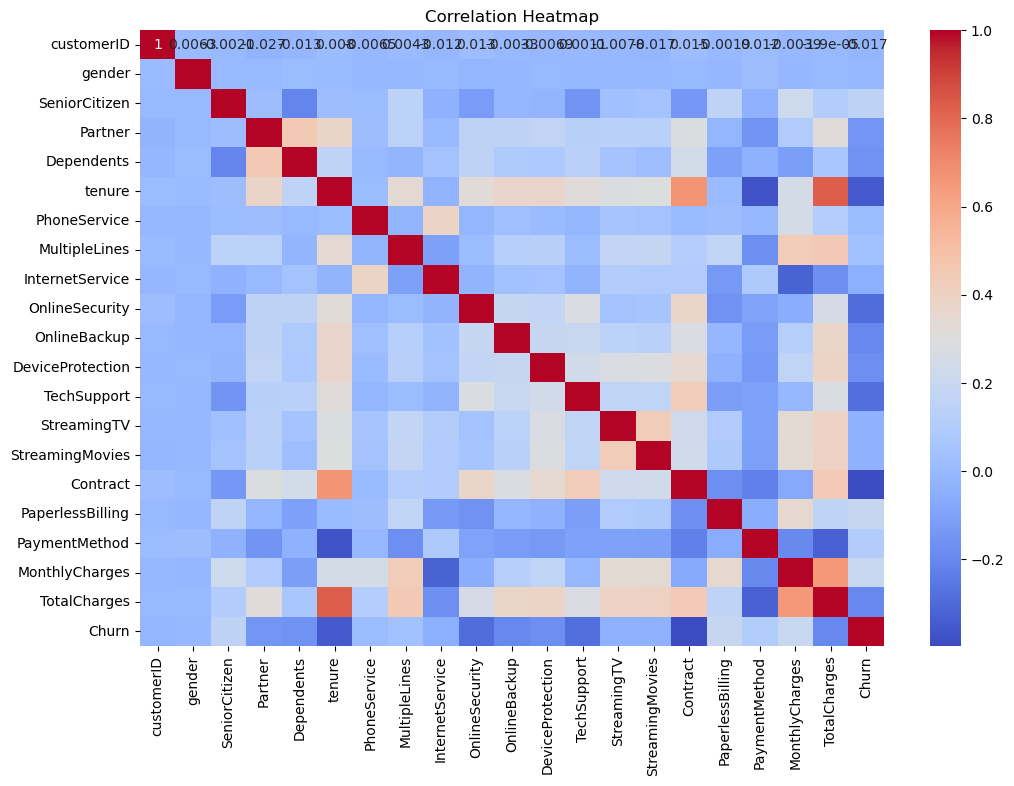

In [64]:
corr = cc.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


SPLIT DATA INTO FEATURES AND TARGET

In [65]:
X = cc.drop('Churn', axis=1)  # Assuming 'Churn' is the target
y = cc['Churn']


SPLIT INTO TRAINING AND TESTING SETS

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


SCALE FEATURES

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


TRAIN MODEL

In [68]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

EVALUATE MODEL

In [70]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')



[[926 109]
 [189 185]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.79
